*Wykonała Amelia Bieda 275973*

# Metody redukcji wariancji

**Metoda Monte Carlo** polega na generowaniu dużej liczby losowych prób i ich estymacji w celu szacowania wartości liczbowych lub prawdopodobieństw. Jest szczególnie przydatna w analizie procesów stochastycznych czy optymalizacji. Kroki estymacji Monte Carlo to:
1. Generowanie losowej próby $X_1, X_2,..., X_n$,
2. Obliczanie wartości interesującej nas funkcji dla próby $X_n$ (np. całki),
3. Estymacja $\mu=\frac{1}{n}\sum^n_{i=1}f(X_i)$.

Dokładność wyników metody Monte Carlo zależy od liczby prób, stąd główną wadą tej metody jest obliczeniowa kosztowność dla uzyskania dokładnych wyników. Niska liczba prób skutkuje dużymi błędami, dlatego stosujemy **metody redukcji wariancji**, które zwiększają dokładność estymacji metod Monte Carlo, na przykład metodę odbić lustrzanych. 

**Metoda odbić lustrzanych** (ang. antithetic variates) polega na generowaniu par skorelowanych zmiennych losowych w taki sposób, aby ich średnia miała mniejszą wariancję niż to, co uzyskano przy użyciu niezależnych zmiennych losowych. Proces metody odbić lustrzanych:
1. Generujemy losową próbę $X_1, X_2,..., X_n$,
2. Generujemy odbicie tej próby, czyli $X_i'=1-X_i ~~\forall i=1,2,...,n$,
3. Oliczamy wartości interesującej nas funkcji dla obu zmiennych losowych $X_i$ i $X_i'$,
4. Uśredniamy te wartości jako $\mu=\frac{1}{2n}\sum^n_{i=1}\big( f(X_i)+f(X_i')\big)$.

Proces ten prowadzi do zmniejszenia wariancji, ponieważ ujemna korelacja między $X_i$ i $X_i'$ często kompensuje wahania w jednej próbce poprzez przeciwstawne wahania w drugiej próbce.

Sprawdźmy dokładność obliczenia całki $\int^1_0\frac{4}{1+x^2}~dx=\pi$ za pomocą wyżej podanych metod. Porównamy ich błędy szacowania względem ilości symulacji.

Użyte biblioteki:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import typing

### Obliczanie całki ogólną metodą Monte Carlo

In [2]:
def monte_carlo(n: int) -> float:
    """
    Estymuje wynik całki z funkcji 4 / (1 + x**2) na przedziale [0,1] za pomocą metody Monte Carlo.
    Args:
        n (int): Wielkość próby.
    Returns:
        (float): Szacowany wynik całki.
    Raises:
        ValueError: jeśli n jest mniejsze lub równe 0.
    Example:
    >>> monte_carlo(n=10**6)
    3.1405852650855013
    """
    if n <= 0:
        raise ValueError("Unsupported argument value.")
    X = np.random.uniform(0, 1, n)
    funkcja_podcalkowa = lambda x: 4 / (1 + x**2)
    return np.mean(funkcja_podcalkowa(X))

In [3]:
print("Estymacja π metodą Monte Carlo: \nπ_1 =", monte_carlo(10**6), "\n  π =", np.pi)

Estymacja π metodą Monte Carlo: 
π_1 = 3.142407433178593 
  π = 3.141592653589793


### Obliczanie całki metodą odbić lustrzanych

In [4]:
def antithetic(n: int) -> float:
    """
    Estymuje wynik całki z funkcji 4 / (1 + x**2) na przedziale [0,1] za pomocą metody odbić lustrzanych.
    Args:
        n (int): Wielkość próby.
    Returns:
        (float): Szacowany wynik całki.
    Raises:
        ValueError: jeśli n jest mniejsze lub równe 0.
    Example:
    >>> antithetic(n=10**6)
    3.1415793321365286
    """
    if n <= 0:
        raise ValueError("Unsupported argument value.")
    X = np.random.uniform(0, 1, n // 2)
    odbicie = 1 - X
    funkcja_podcalkowa = lambda x: 4 / (1 + x**2)
    return np.mean(funkcja_podcalkowa(X) + funkcja_podcalkowa(odbicie)) / 2

In [5]:
print(
    "Estymacja π metodą odbić lustrzanych: \nπ_2 =", antithetic(10**6), "\n  π =", np.pi
)

Estymacja π metodą odbić lustrzanych: 
π_2 = 3.1415544971009632 
  π = 3.141592653589793


### Porównanie błędów bezwzględnych

In [6]:
wielkosci_prob = np.array([10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000])

bledy_monte_carlo = np.zeros(len(wielkosci_prob))
bledy_antithetic = np.zeros(len(wielkosci_prob))

for i, k in enumerate(wielkosci_prob):
    bledy_monte_carlo[i] = np.abs(monte_carlo(k) - np.pi)
    bledy_antithetic[i] = np.abs(antithetic(k) - np.pi)

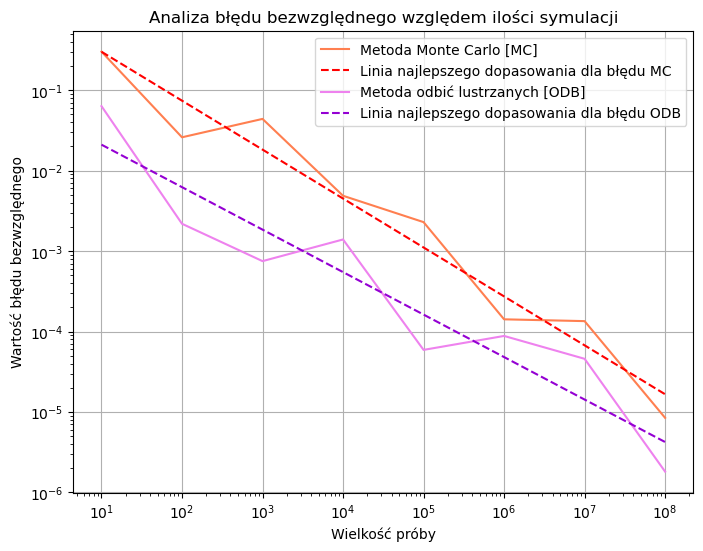

In [7]:
poly_monte_carlo = np.poly1d(
    np.polyfit(np.log10(wielkosci_prob), np.log10(bledy_monte_carlo), 1)
)
poly_antithetic = np.poly1d(
    np.polyfit(np.log10(wielkosci_prob), np.log10(bledy_antithetic), 1)
)

plt.figure(figsize=(8, 6))
plt.plot(
    wielkosci_prob, bledy_monte_carlo, label="Metoda Monte Carlo [MC]", color="coral"
)
plt.plot(
    wielkosci_prob,
    10 ** poly_monte_carlo(np.log10(wielkosci_prob)),
    color="red",
    linestyle="--",
    label="Linia najlepszego dopasowania dla błędu MC",
)
plt.plot(
    wielkosci_prob,
    bledy_antithetic,
    label="Metoda odbić lustrzanych [ODB]",
    color="violet",
)
plt.plot(
    wielkosci_prob,
    10 ** poly_antithetic(np.log10(wielkosci_prob)),
    color="darkviolet",
    linestyle="--",
    label="Linia najlepszego dopasowania dla błędu ODB",
)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Wielkość próby")
plt.ylabel("Wartość błędu bezwzględnego")
plt.title("Analiza błędu bezwzględnego względem ilości symulacji")
plt.legend()
plt.grid(True)
plt.show()

Metoda odbić lustrzanych lepiej estymuje wynik niż ogólna metoda Monte Carlo, dlatego ma mniejsze błedy dla numerycznego obliczania całki. Metody redukcji wariancji pozwalają na uzyskanie dokładniejszych i bardziej stabilnych wyników.